In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import seaborn as sns
from scipy.stats import norm, pearsonr, spearmanr
import scipy.stats as stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

sns.set_context("paper")
simHei = FontProperties(fname=r'/usr/share/fonts/Chinses/simhei.ttf', size=10) 

In [2]:
FDR_THRESHOLD = 0.05 # 差异阈值
RANDOM_SEED = 0

# Load dataset

In [3]:
met_data = pd.read_csv('../data/Preprocess/rawdata_metabolism_abundance.tsv', index_col=0, sep='\t')
met_names = pd.read_csv('../data/Preprocess/rawdata_metabolism_chemicals.tsv', index_col=0, sep='\t')
met_data.head()

,PP99_1,N579,PP02_1,PP65_1,PP01_1,PP09_1,N621,PP117_1,PP80_1,N556,...,N628,PP140_1,N564,N607,PP37_1,N569,N568,PP125_1,N540,PP41_1
pos_metabolite_ID,,,,,,,,,,,,,,,,,,,,,
POS_7,0.002677,0.003906,0.033713,0.003538,0.003946,0.005640,0.018363,0.007910,0.009438,0.014900,...,0.000592,0.001799,0.000235,0.006882,0.000397,0.003298,0.003726,0.046869,0.001400,0.001445
POS_8,0.010665,0.038386,0.079751,0.015239,0.006436,0.017229,0.050683,0.003340,0.005866,0.004384,...,0.044877,0.003442,0.020886,0.041815,0.004280,0.016329,0.042281,0.038650,0.036096,0.004707
POS_10,0.067654,0.000701,0.000889,0.076852,0.071915,0.000511,0.000658,0.263614,0.002931,0.001440,...,0.000799,0.052581,0.000566,0.000609,0.020760,0.000765,0.000590,0.000604,0.001438,0.058367
POS_24,0.014283,0.019426,0.013160,0.013827,0.053086,0.012890,0.017034,0.024071,0.010854,0.017674,...,0.011142,0.016451,0.014555,0.011066,0.009294,0.019891,0.019811,0.018014,0.009332,0.010964
POS_26,0.025595,0.013861,0.018086,0.008634,0.017666,0.015677,0.025903,0.016628,0.011860,0.017793,...,0.015193,0.016763,0.032790,0.029224,0.019837,0.036657,0.024904,0.040068,0.031997,0.011772


# 1. Differential metabolics

In [4]:
statistics = pd.read_csv('../result/Metabolism/differential_untargeted_met.csv', index_col=0)
#sig_asv = (statistics['FDR']<0.05) & ((statistics['FC']>=2)|(statistics['FC']<=0.5))
sigs = (statistics['FDR']<=FDR_THRESHOLD)
statistics = statistics.loc[sigs, :].sort_values(['FDR'])
'差异代谢物:', statistics.shape[0]

('差异代谢物:', 182)

In [13]:
diff_met = met_data.loc[statistics.index, :]

(182, 129)

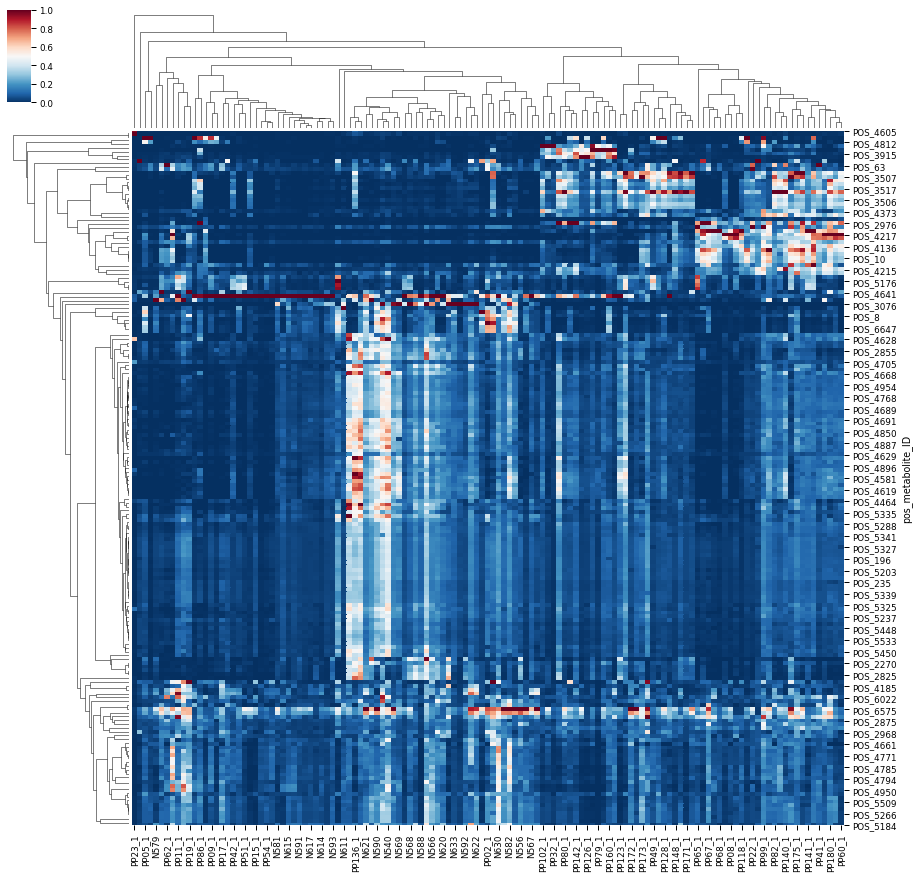

In [140]:
_ = sns.clustermap(diff_met, metric='cosine', cmap='RdBu_r', standard_scale=1, figsize = (15, 15))
_ = plt.show()

# 2. Correlation analysis

In [35]:
def correlation_analysis(data, by='index', method=spearmanr, sampling=1000):
    if by == 'index':
        data = data.copy().T
    correlation_r_res = []
    correlation_p_res = []
    for i in data.columns:
        row_r = []
        row_p = []
        for j in data.columns:
            r, p = method(data[i], data[j])
            row_r.append(r)
            if sampling:
                p = 0
                for rt in range(sampling):
                    x, y = list(data[i]), list(data[j])
                    np.random.shuffle(y)
                    r1, _ = method(x, y)
                    if r1 > r:
                        p += 1
                p = min([p/float(sampling), 1-p/float(sampling)])
            row_p.append(p)
        correlation_r_res.append(row_r)
        correlation_p_res.append(row_p)
        print('###', i)
    correlation_r_res = pd.DataFrame(correlation_r_res, index=data.columns, columns=data.columns)
    correlation_p_res = pd.DataFrame(correlation_p_res, index=data.columns, columns=data.columns)
    return correlation_r_res, correlation_p_res

#corr, corr_p_value = correlation_analysis(diff_met.T, by='columns')  # 以完成

### POS_3076
### POS_5184
### POS_4073
### POS_2976
### POS_4072
### POS_6524
### POS_6647
### POS_6652
### POS_6649
### POS_4136
### POS_10
### POS_6671
### POS_2855
### POS_323
### POS_2853
### POS_2852
### POS_3895
### POS_4215
### POS_4217
### POS_2159
### POS_266
### POS_5932
### POS_4216
### POS_2681
### POS_4373
### POS_3499
### POS_6676
### POS_2848
### POS_4089
### POS_3915
### POS_3751
### POS_8
### POS_3625
### POS_63
### POS_3504
### POS_3507
### POS_4419
### POS_4850
### POS_2815
### POS_5179
### POS_4768
### POS_4846
### POS_5290
### POS_3608
### POS_4736
### POS_4930
### POS_4932
### POS_4934
### POS_3512
### POS_4877
### POS_235
### POS_5340
### POS_5339
### POS_4776
### POS_4887
### POS_4954
### POS_4619
### POS_2823
### POS_3502
### POS_4769
### POS_4896
### POS_4993
### POS_3516
### POS_5511
### POS_5161
### POS_2821
### POS_5338
### POS_4888
### POS_2825
### POS_4992
### POS_4654
### POS_5215
### POS_3505
### POS_4628
### POS_5444
### POS_4582
### POS_5341
### POS_4

In [36]:
#corr.to_csv('Result/3.Metabolism_diff_corr.csv')
#corr_p_value.to_csv('Result/3.Metabolism_diff_corr_p.csv')
corr = pd.read_csv('Result/3.Metabolism_diff_corr.csv', index_col=0)
corr_p_value = pd.read_csv('Result/3.Metabolism_diff_corr_p.csv', index_col=0)

In [41]:
loadings = pd.read_csv('../result/Metabolism/EFA_loading.csv', index_col=0)

In [ ]:
fa_gephi_links = []
fa_nodes = set()
for f in loadings.columns:
    for met in loadings.index:
        if abs(loadings.loc[met, f])>=0.25:
            fa_gephi_links.append([f, met, 'Directed', loadings.loc[met, f], 
                                   abs(loadings.loc[met, f]), np.sign(loadings.loc[met, f])])
        fa_nodes.add((f, f, 'Factor', 0.5))
        fa_nodes.add((met, met_names.loc[met, 'Name'], 'Met', met_data.loc[met, :].mean()))
fa_gephi_links = pd.DataFrame(fa_gephi_links, columns=['Source', 'Target', 'Type', 'loading', 'abs_loading', 'sign_loading'])
fa_nodes = pd.DataFrame(fa_nodes, columns=['Id', 'node_name', 'node_type', 'node_size'])
fa_gephi_links.to_csv('Result/3.Metabolism_fa_gephi_links.csv', index=False)
fa_nodes.to_csv('result/3.Metabolism_fa_gephi_nodes.csv', index=False)

In [51]:
met_names

,id,MS2.name,MS2.score,MS1.name,MS1.ppm,Full_Name,Name
pos_metabolite_ID,,,,,,,
POS_7,7,Adenosine,0.998528,NaN,NaN,Adenosine,Adenosine
POS_8,8,"3beta,6beta-Dihydroxynortropane",0.998516,NaN,NaN,"3beta,6beta-Dihydroxynortropane","3beta,6beta-Dihydroxynort..."
POS_10,10,"(+)-4,11-Eudesmadien-3-one",0.998432,NaN,NaN,"(+)-4,11-Eudesmadien-3-one","(+)-4,11-Eudesmadien-3-on..."
POS_24,24,Di(2-ethylhexyl)phthalate,0.995382,NaN,NaN,Di(2-ethylhexyl)phthalate,Di(2-ethylhexyl)phthalate
POS_26,26,Dikegulac,0.993970,NaN,NaN,Dikegulac,Dikegulac
...,...,...,...,...,...,...,...
POS_7728,7728,NaN,NaN,1-Propene-1-thiol,-2.949688,(MS1)1-Propene-1-thiol,(MS1)1-Propene-1-thiol
POS_7797,7797,NaN,NaN,NaN,NaN,POS_7797,POS_7797
POS_7798,7798,NaN,NaN,NaN,NaN,POS_7798,POS_7798


In [52]:
corr_links = []
corr_nodes = set()
mets = list(corr.columns)
for i in range(len(corr)-1):
    for j in range(i+1, len(corr)):
        if corr_p_value.iloc[i, j]<0.01 and abs(corr.iloc[i, j])>0.25:
            corr_links.append([mets[i], mets[j], abs(corr.iloc[i, j]), corr.iloc[i, j], np.sign(corr.iloc[i, j])])
            met = mets[i]
            name = met_names.loc[met, 'Name']
            name = '' if 'POS' in  name else name.replace('(MS1)', '')
            max_factor = loadings.loc[met, loadings.loc[met, :]==loadings.loc[met, :].max()].index[0]
            corr_nodes.add((met, name, 'Met', abs(loadings.loc[met, max_factor]), max_factor))
            met = mets[j]
            name = met_names.loc[met, 'Name']
            name = '' if 'POS' in  name else name.replace('(MS1)', '')
            max_factor = loadings.loc[met, loadings.loc[met, :]==loadings.loc[met, :].max()].index[0]
            corr_nodes.add((met, name, 'Met', abs(loadings.loc[met, max_factor]), max_factor))

corr_links = pd.DataFrame(corr_links, columns=['Source', 'Target', 'Weight', 'r', 'sign_r'])
corr_nodes = pd.DataFrame(corr_nodes, columns=['Id', 'Label', 'node_type', 'node_size', 'factor'])
corr_links.to_csv('Result/3.Metabolism_corr_links.csv', index=False)
corr_nodes.to_csv('Result/3.Metabolism_corr_nodes.csv', index=False)

# 3. Classification Model

In [53]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, average_precision_score, roc_auc_score, f1_score
from sklearn.metrics import balanced_accuracy_score

In [54]:
def scoring(clf, x, y):
    pred = clf.predict(x)
    proba = clf.predict_proba(x)[:, 1]
    TP = ((pred==1) & (y==1)).sum()
    FP = ((pred==1) & (y==0)).sum()
    TN = ((pred==0) & (y==0)).sum()
    FN = ((pred==0) & (y==1)).sum()
    sen = TP/ float(TP + FN)
    spe = TN / float(FP + TN)
    recall = recall_score(y, pred)
    precision = precision_score(y, pred)
    auc = roc_auc_score(y, proba)
    f1 = f1_score(y, pred)
    return [sen, spe, recall, precision, f1, auc]
            
def try_Models(X, Y):
    Method = {'Logistic(l1)':LogisticRegression(penalty='l1', random_state=RANDOM_SEED, solver='liblinear', class_weight='balanced'),
              'Logistic(l2)':LogisticRegression(penalty='l2', random_state=RANDOM_SEED, solver='liblinear', class_weight='balanced'),
              'DecisionTree':DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_SEED),
              'RandomForest':RandomForestClassifier(n_estimators=501, max_depth=5, class_weight='balanced', random_state=RANDOM_SEED),
              'GradientBoost':GradientBoostingClassifier(random_state=RANDOM_SEED),
              }
    results= []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED) # 随机分5-fold
    for method, clf in Method.items():
        self_scores = []
        cross_scores = []
        for train_index, test_index in skf.split(X, Y):
            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test = Y[train_index], Y[test_index]
            clf.fit(X_train, Y_train)
            self_scores.append(scoring(clf, X_train, Y_train))
            cross_scores.append(scoring(clf, X_test, Y_test))
        self_scores = list(pd.DataFrame(self_scores).mean())
        cross_scores = list(pd.DataFrame(cross_scores).mean())
        row = [method]
        row.extend(self_scores)
        row.extend(cross_scores)
        results.append(row)
    results = pd.DataFrame(results, columns=['classifier', 'self_sensitivity', 'self_specifity', 'self_recall',
                                             'self_precision', 'self_f1', 'self_auc', 'cross_sensitivity',
                                             'cross_specifity', 'cross_recall', 'cross_precision', 'cross_f1',
                                             'cross_auc',])
    return results

def plot_auc(X, Y, clf):
    plt.figure(1, (6, 5.5), dpi=300)
    k, tprs, aucs, mean_fpr = 0, [], [], np.linspace(0, 1, 100)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED) # 随机分5-fold
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        proba = clf.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(Y_test, proba)
        fpr, tpr, thresholds = roc_curve(Y_test, proba) # fpr,tpr 
        aucs.append(auc_score)
        k += 1
        tprs.append(np.interp(mean_fpr, fpr, tpr))#插值
        tprs[-1][0] = 0.0
        _ = plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold %d(AUC = %0.2f)' %(k+1, auc_score)) # k-fold ROC
    _ = plt.plot([0, 1], [0, 1], ls='--', lw=2, color='r')
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    _ = plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    _ = plt.plot(mean_fpr, mean_tpr, color='b', 
                 label='Mean ROC(AUC=%0.2f $\pm$ %0.2f)'%(mean_auc, std_auc)) # k-fold mean ROC
    _ = plt.legend(loc='lower right')
    _ = plt.xlim([-0.05, 1.05])
    _ = plt.ylim([-0.05, 1.05])
    _ = plt.xlabel('False Positive Rate', fontsize=13)
    _ = plt.ylabel('True Positive Rate', fontsize=13)
    plt.show()

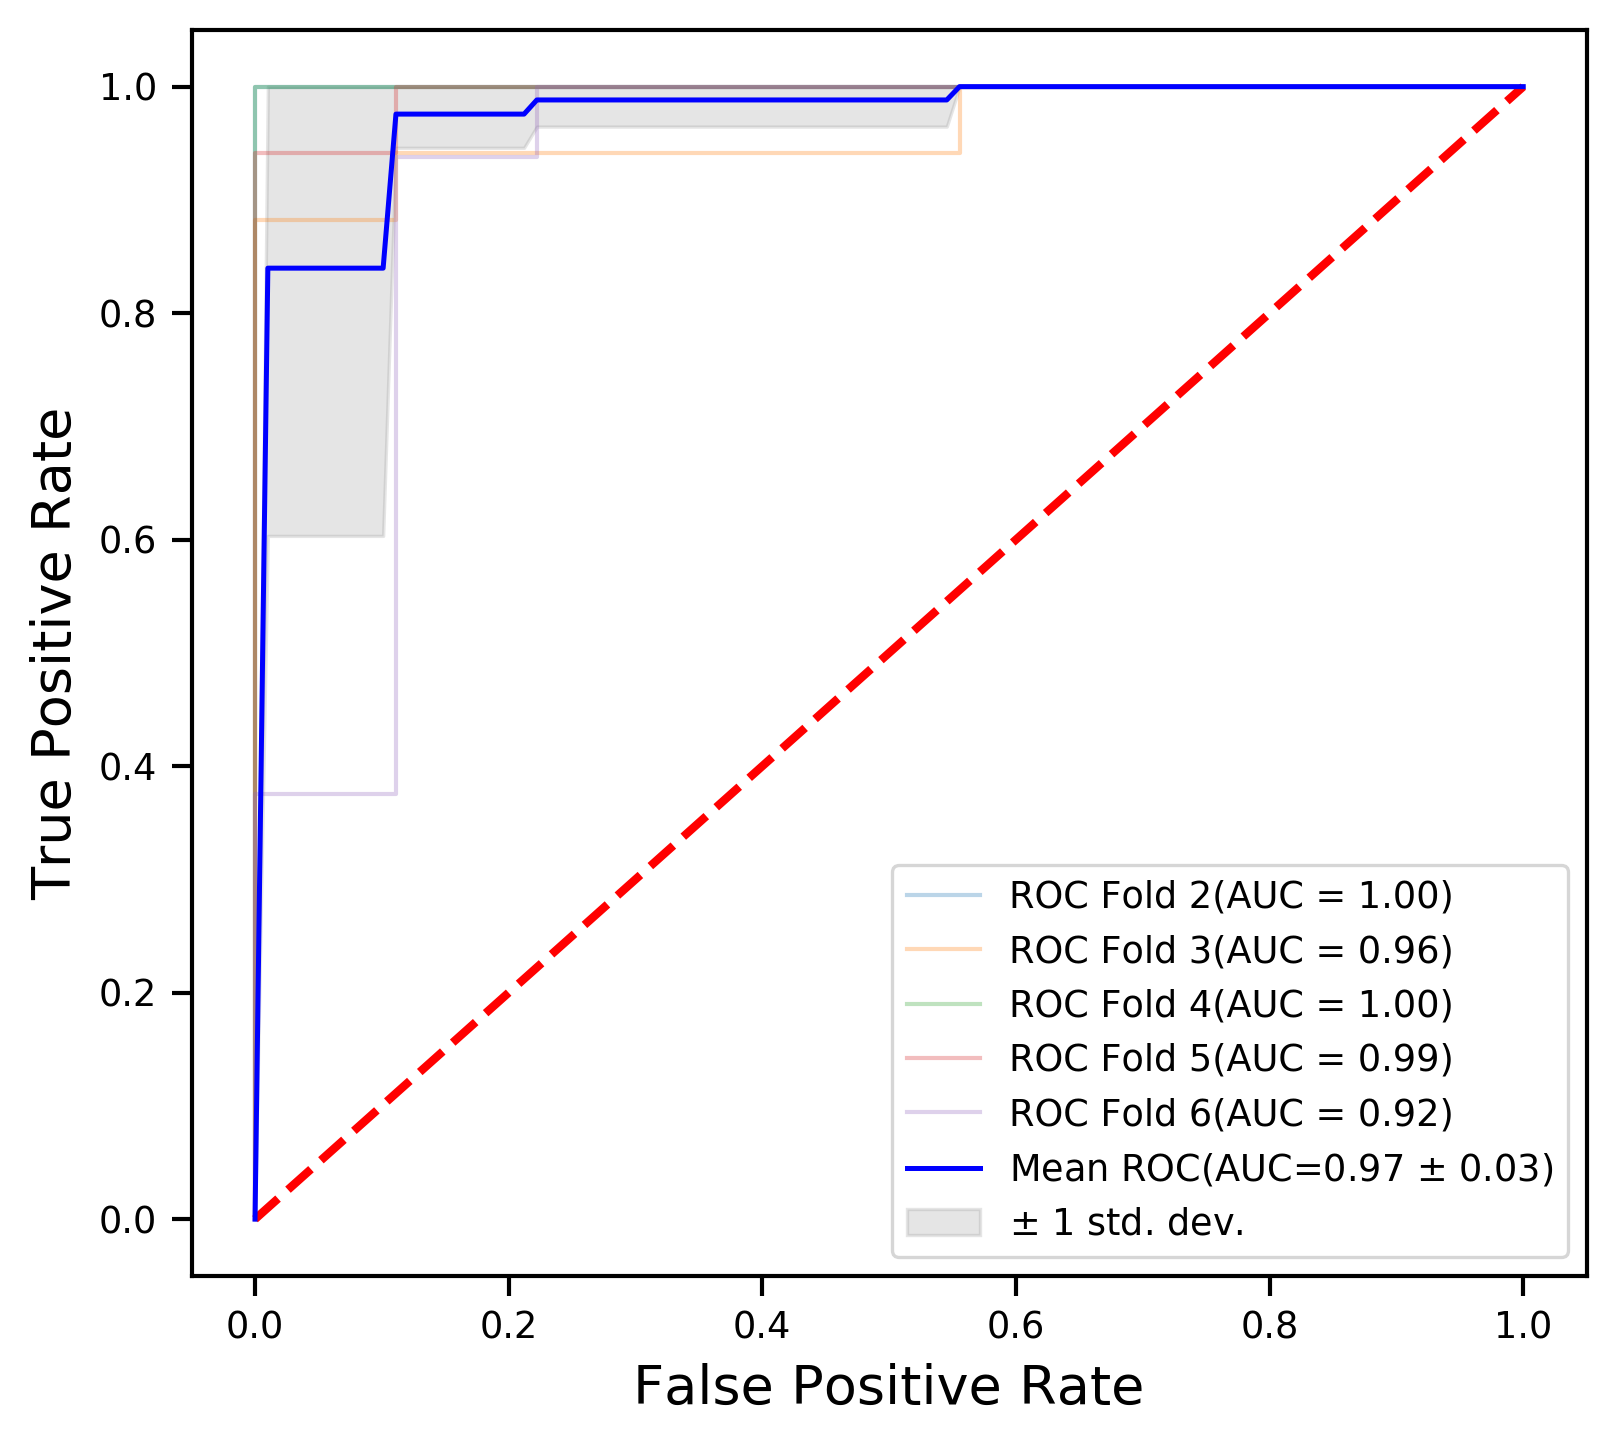

In [55]:
statistics_met = pd.read_csv('../result/Metabolism/differential_untargeted_met.csv', index_col=0)
sig_met = (statistics_met['FDR']<=FDR_THRESHOLD)
statistics_met = statistics_met.loc[sig_met, :].sort_values(['FDR'])
temp = met_data.loc[statistics_met.index, :]
###
X = temp.T.values
Y = np.array([0 if i[0]=='N' else 1 for i in temp.columns])
res = try_Models(X, Y)
###
clf = RandomForestClassifier(n_estimators=501, max_depth=5, class_weight='balanced', random_state=RANDOM_SEED)
plot_auc(X, Y, clf)

# 4. Relationship between ASV and metabolics

In [9]:
# ASV信息
statistic_asv = pd.read_csv('../result/Microbiome/differential_asv.csv', index_col=0)
asv_data = pd.read_csv('../data/Preprocess/rawdata_16S_abundance.tsv', index_col=0, sep='\t')
taxa_data = pd.read_csv('../data/Preprocess/rawdata_16S_taxa.tsv', index_col=0, sep='\t')
sig_asv = (statistic_asv['FDR']<=0.05)
statistic_asv = statistic_asv.loc[sig_asv, :].sort_values(['FDR'])
diff_asv = asv_data.loc[statistic_asv.index, :]
diff_asv.shape

(45, 168)

In [15]:
# 样本交集
overlap_samples = set(diff_asv.columns)&set(diff_met.columns)
len(overlap_samples)

97

In [21]:
def correlation_analysis_2_matrix(data1, data2, method=spearmanr, sampling=1000):
    sample_overlap = set(data1.columns)&set(data2.columns)
    temp1 = data1.loc[:, sample_overlap]
    temp2 = data2.loc[:, sample_overlap]
    correlation_r_res = np.zeros((temp1.shape[0], temp2.shape[0]))
    correlation_p_res = np.ones((temp1.shape[0], temp2.shape[0]))
    for i in range(temp1.shape[0]):
        for j in range(temp2.shape[0]):
            r, p = method(temp1.iloc[i, :], temp2.iloc[j, :])
            correlation_r_res[i, j] = r
            correlation_p_res[i, j] = p
            if sampling:
                p = 0
                for rt in range(sampling):
                    x, y = list(temp1.iloc[i, :]), list(temp2.iloc[j, :])
                    np.random.shuffle(y)
                    r1, _ = method(x, y)
                    if r1 > r:
                        p += 1
                p = min([p/float(sampling), 1-p/float(sampling)])
                correlation_p_res[i, j] = p
        print('###', i)
    correlation_r_res = pd.DataFrame(correlation_r_res, index=temp1.index, columns=temp2.index)
    correlation_p_res = pd.DataFrame(correlation_p_res, index=temp1.index, columns=temp2.index)
    return correlation_r_res, correlation_p_res

#corr_r, corr_p = correlation_analysis_2_matrix(diff_asv, diff_met, method=spearmanr, sampling=1000)

### 0
### 1
### 2
### 3
### 4
### 5
### 6
### 7
### 8
### 9
### 10
### 11
### 12
### 13
### 14
### 15
### 16
### 17
### 18
### 19
### 20
### 21
### 22
### 23
### 24
### 25
### 26
### 27
### 28
### 29
### 30
### 31
### 32
### 33
### 34
### 35
### 36
### 37
### 38
### 39
### 40
### 41
### 42
### 43
### 44


In [24]:
#corr_r.to_csv('Result/3.Metabolism_diff_corr_with_ASV.csv')
#corr_p.to_csv('Result/3.Metabolism_diff_corr_p_with_ASV.csv')
corr_r = pd.read_csv('Result/3.Metabolism_diff_corr_with_ASV.csv', index_col=0)
corr_p_value = pd.read_csv('Result/3.Metabolism_diff_corr_p_with_ASV.csv', index_col=0)

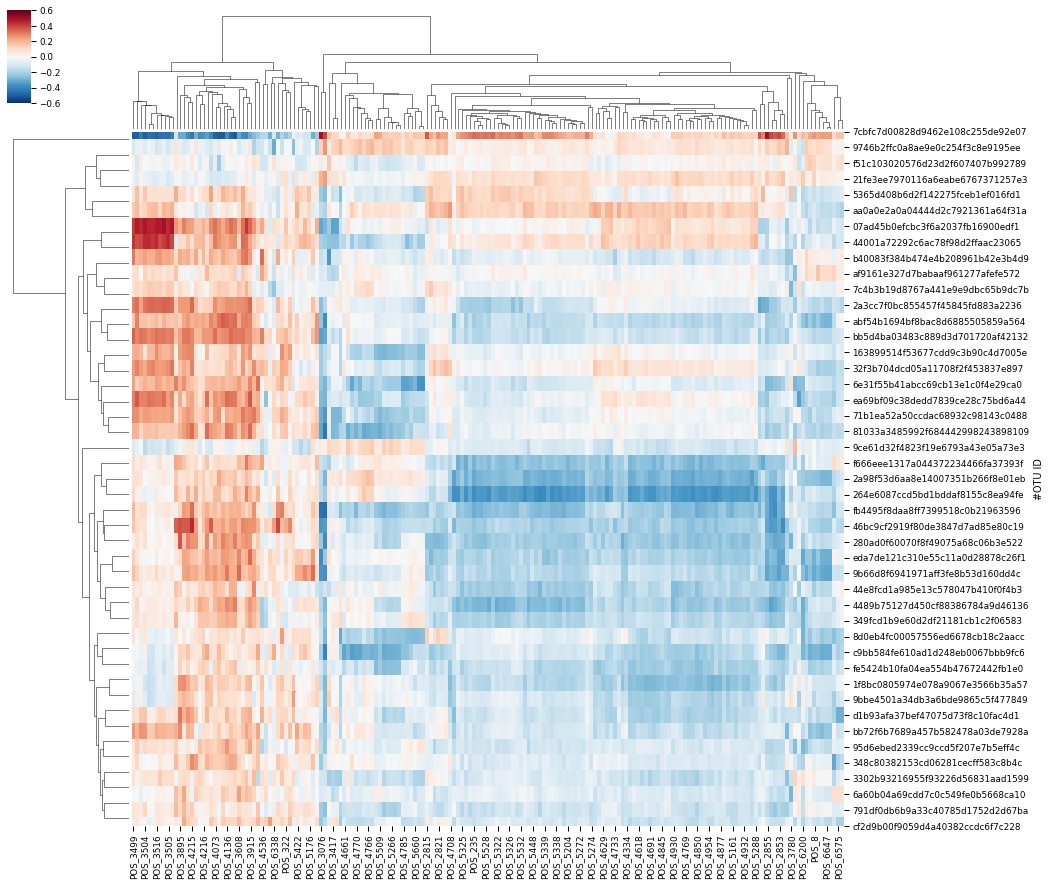

In [31]:
_ = sns.clustermap(corr_r, metric='euclidean', cmap='RdBu_r', vmin=-0.6, vmax=0.6, figsize = (15, 15))
_ = plt.show()

# 5. Met Factor vs ASV Factor

In [198]:
asv_fa_scores = pd.read_csv('Result/sign_recheck/2. Microbiome_EFA_scores_signcheck.csv', index_col=0)
asv_fa_scores.columns = ['ASV_'+i for i in asv_fa_scores.columns]

met_fa_scores = pd.read_csv('Result/sign_recheck/3. Metabolism_EFA_scores_signcheck.csv', index_col=0)
met_fa_scores.columns = ['MET_'+i for i in met_fa_scores.columns]

In [199]:
#fa_corr_r, fa_corr_p = correlation_analysis_2_matrix(asv_fa_scores.T, met_fa_scores.T, method=spearmanr, sampling=1000)
#fa_corr_r.to_csv('Result/3.Metabolism_fa_corr_with_ASV.csv')
#fa_corr_p.to_csv('Result/3.Metabolism_fa_corr_p_with_ASV.csv')
fa_corr_r = pd.read_csv('Result/3.Metabolism_fa_corr_with_ASV.csv', index_col=0)
fa_corr_p = pd.read_csv('Result/3.Metabolism_fa_corr_p_with_ASV.csv', index_col=0)

### 0
### 1
### 2
### 3
### 4
### 5
### 6
### 7
### 8
### 9


<Figure size 6000x3600 with 0 Axes>

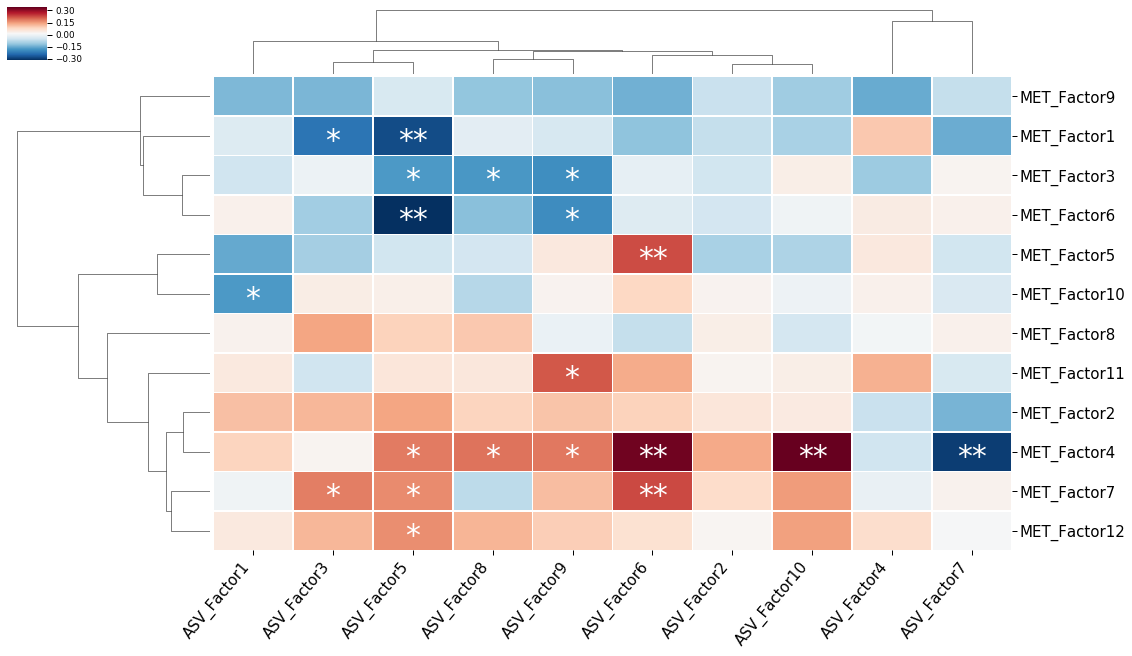

In [257]:
_ = plt.figure(figsize=(20, 12), dpi=300)
g = sns.clustermap(fa_corr_r.T, metric='cosine', cmap='RdBu_r', linewidths=0.5, figsize=(18, 10))

_ = g.ax_heatmap.set_ylim(fa_corr_r.T.shape[0], -0.0)
xticklabels = np.array(fa_corr_r.T.columns)[g.dendrogram_col.reordered_ind]
_ = g.ax_heatmap.set_xticklabels(xticklabels, rotation=50, ha='right', fontsize=15)
yticklabels = np.array(fa_corr_r.T.index)[g.dendrogram_row.reordered_ind]
_ = g.ax_heatmap.set_yticklabels(yticklabels, rotation=360, ha='left', fontsize=15)

### -log P-value
for mf in range(len(xticklabels)):
    for af in range(len(yticklabels)):
        log_p = fa_corr_p.T.loc[yticklabels[af], xticklabels[mf]]
        _ = g.ax_heatmap.annotate('**' if log_p<=0.01 else ('*' if log_p<=0.05 else ''), 
                                  (mf+(0.32 if log_p<=0.01 else 0.4), af+0.85), 
                                 fontsize=30, color='white')